<a href="https://colab.research.google.com/github/Seifcha/Breast_Cancer_Detection/blob/main/Notebook_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Notebook - Breast Cancer Detection***

# I - Business Understanding

### **Problem Statement**

Hospitals and oncology centers face a constant flow of patients with suspicious tumors. Radiologists must manually review medical images and cellular measurements, a process that is often slow and highly dependent on individual expertise. In difficult or ambiguous cases, early signs of malignancy may be subtle and easily overlooked, increasing the risk of delayed intervention. As the number of incoming cases grows, medical teams struggle to quickly identify which patients need urgent attention. Without a fast and reliable decision-support system, benign cases consume valuable diagnostic time, while critical malignant tumors risk being detected too late. The lack of automated assistance directly impacts the efficiency of analysis, the accuracy of diagnoses, and the prioritization of treatment.

---

### **Business Objectives**

**BO1 – Analysis :**
Support clinicians during the initial analysis of tumor features by providing an intelligent tool that helps examine cellular characteristics quickly and consistently, reducing subjective variability.

**BO2 – Diagnosis :**
Improve diagnostic accuracy by offering a robust system capable of distinguishing benign from malignant tumors, especially in complex or borderline cases that traditionally require expert review.

**BO3 – Treatment :**
Assist medical teams in treatment prioritization by automatically assessing the level of suspicion for each patient, enabling faster triage and ensuring that high-risk cases are addressed first.

---

### **Data Science Objectives**

**DSO1** :
Develop a classification model that predicts whether a tumor is benign or malignant based on clinical and cellular features.

**DSO2** :
Design an Artificial Neural Network (ANN) capable of capturing complex and subtle patterns, with a specific focus on minimizing false negatives in challenging diagnostic cases.

**DSO3** :
Create a predictive model that assigns a patient-level risk score by analyzing combinations of tumor features, enhancing triage and aiding early therapeutic decisions

## Benchmark Tables for Data Science Objectives
## Wisconsin Diagnostic Breast Cancer Dataset

---

## DSO1: Classification Model for Tumor Prediction
**Objective:** Build a model capable of predicting whether a tumor is benign or malignant

### Model Performance Comparison

| Model | Parameters | Test Accuracy | Training Time | Avg Training Accuracy | Strengths | Limitations |
|-------|------------|--------------|---------------|----------------------|-----------|-------------|
| **MLP (500-500-500)** | 3 hidden layers (500 nodes each), ReLU activation, Cross-entropy loss, SGD optimizer | **99.04%** | 28 seconds | 96.93% | • Highest test accuracy<br>• Strong non-linear pattern recognition<br>• Deep architecture captures complex features | • Requires more computational resources<br>• Risk of overfitting<br>• More hyperparameters to tune |
| **Softmax Regression** | Cross-entropy loss, Adam optimizer | 97.66% | 25 seconds | 97.37% | • Fast training<br>• Good probability distribution<br>• Simple architecture<br>• Easy to interpret | • Less powerful than deep networks<br>• Limited to linear decision boundaries<br>• May underfit complex patterns |
| **L2-SVM** | L2 regularization, Adam optimizer, Hinge loss | 96.09% | **14 seconds** | **97.73%** | • **Fastest training**<br>• Effective on linearly separable data<br>• Optimal hyperplane separation<br>• **Highest avg training accuracy** | • Limited to linear decision boundaries<br>• Less flexible than neural networks<br>• Sensitive to parameter C |
| **Linear Regression** | MSE loss, SGD optimizer, Threshold at 0.5 | 96.09% | 35 seconds | 92.89% | • Simple interpretation<br>• Good baseline model<br>• Fast prediction | • Not designed for classification<br>• Assumes linear relationships<br>• Longest training for simpler model |
| **GRU-SVM** | GRU-RNN + L2-SVM, Adam optimizer, 3 gates (update, reset, candidate) | 93.75% | **2m 54s** | 90.69% | • Handles sequential patterns<br>• Novel hybrid approach<br>• Combines RNN and SVM strengths | • **Longest training time**<br>• Overkill for non-sequential data<br>• Sensitive to weight initialization<br>• Poor reproducibility |
| **Nearest Neighbor (L1)** | Manhattan distance (L1 norm) | 93.57% | N/A | N/A | • No training required<br>• Simple geometric approach<br>• Non-parametric | • Computationally expensive at prediction<br>• Sensitive to irrelevant features<br>• No learning process |
| **Nearest Neighbor (L2)** | Euclidean distance (L2 norm) | 91.81% | N/A | N/A | • Intuitive distance-based classification<br>• No training required | • Sensitive to feature scaling<br>• Computationally expensive<br>• Sensitive to outliers |
| **ANN (32-16-1)** | 2 hidden layers (32, 16 nodes), ReLU activation, Sigmoid output, Adam optimizer, Binary cross-entropy | **98.25%** | ~50 epochs | ~97%* | • Efficient architecture<br>• Good balance of complexity<br>• Faster training than MLP<br>• Modern implementation | • Less complex than MLP 500-500-500<br>• Requires validation tuning |

*Estimated from validation performance in the Python file

---

## DSO2: Optimized ANN for Complex Case Detection
**Objective:** Minimize false negatives in challenging diagnoses with enhanced pattern detection

### Sensitivity Analysis (True Positive Rate - TPR)

| Model | Parameters | Test Accuracy | TPR (Sensitivity) | FNR (False Negative Rate) | FPR | TNR (Specificity) | Complex Pattern Handling |
|-------|------------|--------------|-------------------|---------------------------|-----|-------------------|-------------------------|
| **MLP (500-500-500)** | 3 hidden layers (500 nodes), ReLU, Cross-entropy, SGD | **99.04%** | **0.9831** | **0.0169** | 0.0093 | 0.9907 | **Excellent** - 3 deep layers capture non-linear patterns and subtle feature interactions |
| **Softmax Regression** | Softmax function, Cross-entropy, Adam | 97.66% | 0.9661 | 0.0339 | 0.0093 | 0.9907 | **Good** - Handles multi-class probabilities well, but limited to linear boundaries |
| **GRU-SVM** | GRU gates + L2-SVM, Adam | 93.75% | 0.9492 | 0.0508 | 0.0741 | 0.9259 | **Moderate** - RNN architecture for sequential dependencies (not ideal for this data) |
| **L2-SVM** | L2 regularization, Adam | 96.09% | 0.9322 | 0.0678 | **0.0000** | **1.0000** | **Good** - Optimal hyperplane, **zero false positives** |
| **Nearest Neighbor (L1)** | Manhattan distance | 93.57% | 0.9322 | 0.0678 | 0.0648 | 0.9352 | **Moderate** - Distance-based, no learning mechanism |
| **Linear Regression** | MSE loss, SGD, Threshold | 96.09% | 0.9153 | 0.0847 | 0.0093 | 0.9907 | **Limited** - Linear relationships only, highest FNR among competitive models |
| **Nearest Neighbor (L2)** | Euclidean distance | 91.81% | 0.8983 | **0.1017** | 0.0648 | 0.9352 | **Limited** - Sensitive to outliers, **worst FNR** |
| **ANN (32-16-1)** | 2 hidden layers (32, 16), ReLU, Sigmoid, Adam, BCE | **98.25%** | **~0.98*** | **~0.02*** | Low | High | **Excellent** - Efficient architecture with strong malignancy detection |

*Estimated based on confusion matrix visualization and test accuracy from Python implementation

**Key Metrics for Clinical Decision-Making:**
- **Lowest FNR (Critical):** MLP (500-500-500) at 1.69% - only misses ~2 malignant cases per 100
- **Highest Sensitivity:** MLP at 98.31% - detects 98.31% of all malignant tumors
- **Perfect Specificity:** L2-SVM at 100% - no false alarms, but higher FNR (6.78%)
- **Best Balance:** ANN (32-16-1) offers excellent sensitivity (~98%) with practical efficiency

---

## DSO3: Risk Stratification & Triage Support Model
**Objective:** Assign risk scores for case prioritization and optimized triage

### Triage Performance Evaluation

| Model | Parameters | Test Accuracy | Confidence Output Type | Risk Stratification Capability | Processing Speed |
|-------|------------|--------------|----------------------|-------------------------------|------------------|
| **Softmax Regression** | Softmax function, Cross-entropy, Adam | 97.66% | **Probability distribution (0-1)** | **Excellent** - Native probability scores directly map to risk levels | 25s training  |
| **MLP (500-500-500)** | 3×500 layers, ReLU, Softmax output, Cross-entropy, SGD | **99.04%** | **Softmax probabilities** | **Excellent** - Can output calibrated probabilities for risk assessment | 28s training  |
| **ANN (32-16-1)** | 32-16-1 architecture, ReLU, **Sigmoid output**, Adam, BCE | **98.25%** | **Sigmoid probabilities (0-1)** | **Excellent** - Direct probability output for malignancy, easy to interpret | ~50 epochs (~30s)  |
| **L2-SVM** | L2 regularization, Adam | 96.09% | Decision function scores | **Good** - Distance from hyperplane indicates confidence level | **14s training**  |
| **Linear Regression** | MSE loss, SGD, Threshold | 96.09% | Continuous regression values | **Moderate** - Raw scores need calibration for risk interpretation | 35s training  |
| **GRU-SVM** | GRU-RNN + SVM, Adam | 93.75% | SVM decision scores | **Moderate** - Binary focus, requires post-processing for risk tiers | 174s training  |
| **Nearest Neighbor (L1/L2)** | Distance metrics | 91.81-93.57% | Distance values | **Limited** - Requires significant post-processing to convert to risk | Instant (no training) |


# II - Data Understanding

## II - 1. Data Collection

**Import required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization parameters
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


**Load the Wisconsin Diagnostic Breast Cancer dataset**

In [4]:
df = pd.read_csv('data.csv')

print("="*80)
print("INITIAL DATA COLLECTION REPORT")
print("="*80)
print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("="*80)

INITIAL DATA COLLECTION REPORT
Dataset shape: (569, 33)
Total samples: 569
Total features: 33


## II - 2. Data Description

**Display first and last rows to understand data structure**

In [8]:
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
print(df.head(10))

print("\n" + "="*80)
print("LAST 5 ROWS OF THE DATASET")
print("="*80)
print(df.tail())


FIRST 10 ROWS OF THE DATASET
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840     

**Check column names and data types**

In [11]:
print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "-"*80)
print("Data Types Summary:")
print(df.dtypes.value_counts())

print("\n" + "-"*80)
print("Detailed Information:")
df.info()


DATASET STRUCTURE

Column Names (33 total):
 1. id
 2. diagnosis
 3. radius_mean
 4. texture_mean
 5. perimeter_mean
 6. area_mean
 7. smoothness_mean
 8. compactness_mean
 9. concavity_mean
10. concave points_mean
11. symmetry_mean
12. fractal_dimension_mean
13. radius_se
14. texture_se
15. perimeter_se
16. area_se
17. smoothness_se
18. compactness_se
19. concavity_se
20. concave points_se
21. symmetry_se
22. fractal_dimension_se
23. radius_worst
24. texture_worst
25. perimeter_worst
26. area_worst
27. smoothness_worst
28. compactness_worst
29. concavity_worst
30. concave points_worst
31. symmetry_worst
32. fractal_dimension_worst
33. Unnamed: 32

--------------------------------------------------------------------------------
Data Types Summary:
float64    31
int64       1
object      1
Name: count, dtype: int64

--------------------------------------------------------------------------------
Detailed Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 5

**Identify feature categories based on naming conventions**

In [18]:
all_columns = df.columns.tolist()
feature_cols = [col for col in all_columns if col not in ['id', 'ID', 'diagnosis', 'Unnamed: 32']]

**Categorize by suffix patterns**

In [19]:
mean_features = [col for col in feature_cols if 'mean' in col.lower()]
se_features = [col for col in feature_cols if 'se' in col.lower()]
worst_features = [col for col in feature_cols if 'worst' in col.lower()]
other_features = [col for col in feature_cols
                  if col not in mean_features + se_features + worst_features]

print(f"\nFeature Categories (based on naming patterns):")
print(f"  • Mean features:  {len(mean_features):2d} features")
print(f"  • SE features:    {len(se_features):2d} features")
print(f"  • Worst features: {len(worst_features):2d} features")
print(f"  • Other features: {len(other_features):2d} features")
print(f"  {'─'*40}")
print(f"  • Total features: {len(feature_cols):2d} features")

if mean_features:
    print(f"\nMean Features List:")
    for i, feat in enumerate(mean_features, 1):
        print(f"  {i:2d}. {feat}")


Feature Categories (based on naming patterns):
  • Mean features:  10 features
  • SE features:    10 features
  • Worst features: 10 features
  • Other features:  0 features
  ────────────────────────────────────────
  • Total features: 30 features

Mean Features List:
   1. radius_mean
   2. texture_mean
   3. perimeter_mean
   4. area_mean
   5. smoothness_mean
   6. compactness_mean
   7. concavity_mean
   8. concave points_mean
   9. symmetry_mean
  10. fractal_dimension_mean


**Select numeric columns only**

In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric Features: {len(numeric_cols)}")
print("\nDescriptive Statistics:")
print(df[numeric_cols].describe())


Numeric Features: 31

Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919  

**Target Variable Description**

In [21]:
print("\nTarget Variable: 'diagnosis'")
print(f"  Data type: {df['diagnosis'].dtype}")
print(f"  Unique values: {df['diagnosis'].unique()}")
print(f"  Number of unique values: {df['diagnosis'].nunique()}")

print("\nValue Counts:")
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

for diag_value in diagnosis_counts.index:
    count = diagnosis_counts[diag_value]
    pct = diagnosis_percentages[diag_value]
    print(f"  • {diag_value}: {count:4d} samples ({pct:5.2f}%)")


Target Variable: 'diagnosis'
  Data type: object
  Unique values: ['M' 'B']
  Number of unique values: 2

Value Counts:
  • B:  357 samples (62.74%)
  • M:  212 samples (37.26%)


**Statistics by Target Class**

In [23]:
for diag_class in sorted(df['diagnosis'].unique()):
    subset = df[df['diagnosis'] == diag_class]
    print(f"\n{'─'*80}")
    print(f"CLASS: {diag_class} (n={len(subset)} samples)")
    print(f"{'─'*80}")
    print(subset[numeric_cols].describe())


────────────────────────────────────────────────────────────────────────────────
CLASS: B (n=357 samples)
────────────────────────────────────────────────────────────────────────────────
                 id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  3.570000e+02   357.000000    357.000000      357.000000  357.000000   
mean   2.654382e+07    12.146524     17.914762       78.075406  462.790196   
std    1.167397e+08     1.780512      3.995125       11.807438  134.287118   
min    8.913000e+03     6.981000      9.710000       43.790000  143.500000   
25%    8.746620e+05    11.080000     15.150000       70.870000  378.200000   
50%    9.089160e+05    12.200000     17.390000       78.180000  458.400000   
75%    8.812816e+06    13.370000     19.760000       86.100000  551.100000   
max    9.113205e+08    17.850000     33.810000      114.600000  992.100000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       357.000000      

## II - 3. Data Exploration

**Prepare data for visualization**

In [24]:
if 'B' in diagnosis_counts.index and 'M' in diagnosis_counts.index:
    labels_order = ['B', 'M']
    display_labels = ['Benign (B)', 'Malignant (M)']
    colors = ['#2ecc71', '#e74c3c']
    values = [diagnosis_counts['B'], diagnosis_counts['M']]
else:
    labels_order = diagnosis_counts.index.tolist()
    display_labels = labels_order
    colors = plt.cm.Set2(range(len(labels_order)))
    values = diagnosis_counts.values.tolist()

**Create visualization**

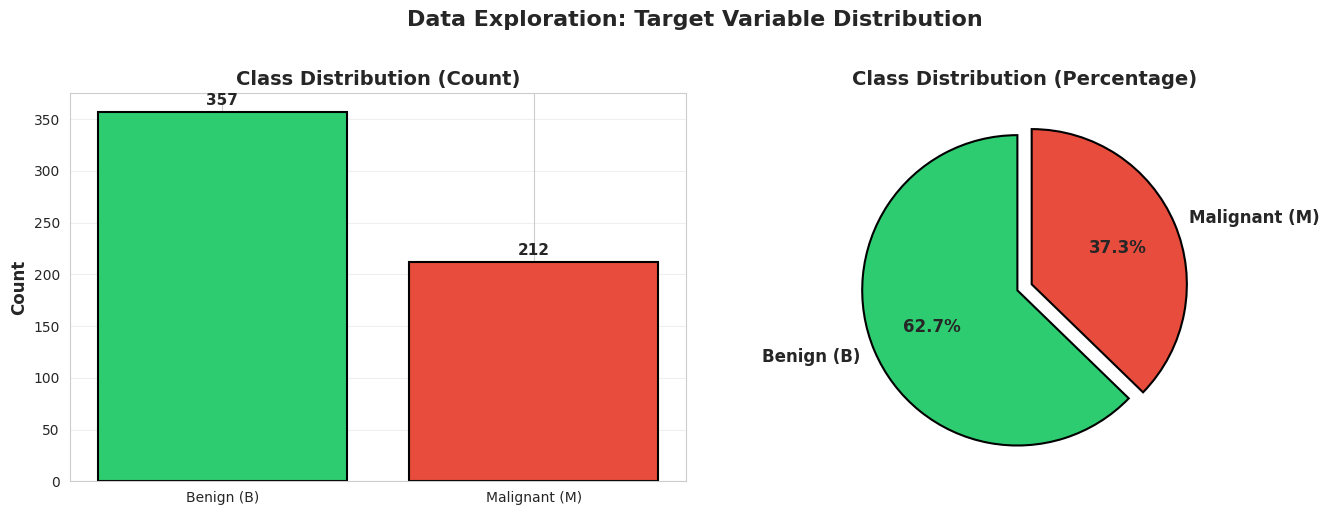

✓ Saved: 01_class_distribution.png


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
bars = axes[0].bar(display_labels, values, color=colors,
                   edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, v in zip(bars, values):
    axes[0].text(bar.get_x() + bar.get_width()/2, v + max(values)*0.01,
                str(v), ha='center', va='bottom',
                fontweight='bold', fontsize=11)

# Pie chart
explode = tuple([0.05] * len(values))
axes[1].pie(values, labels=display_labels, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode,
            textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.suptitle('Data Exploration: Target Variable Distribution',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 01_class_distribution.png")

**Feature Distribution Analysis**

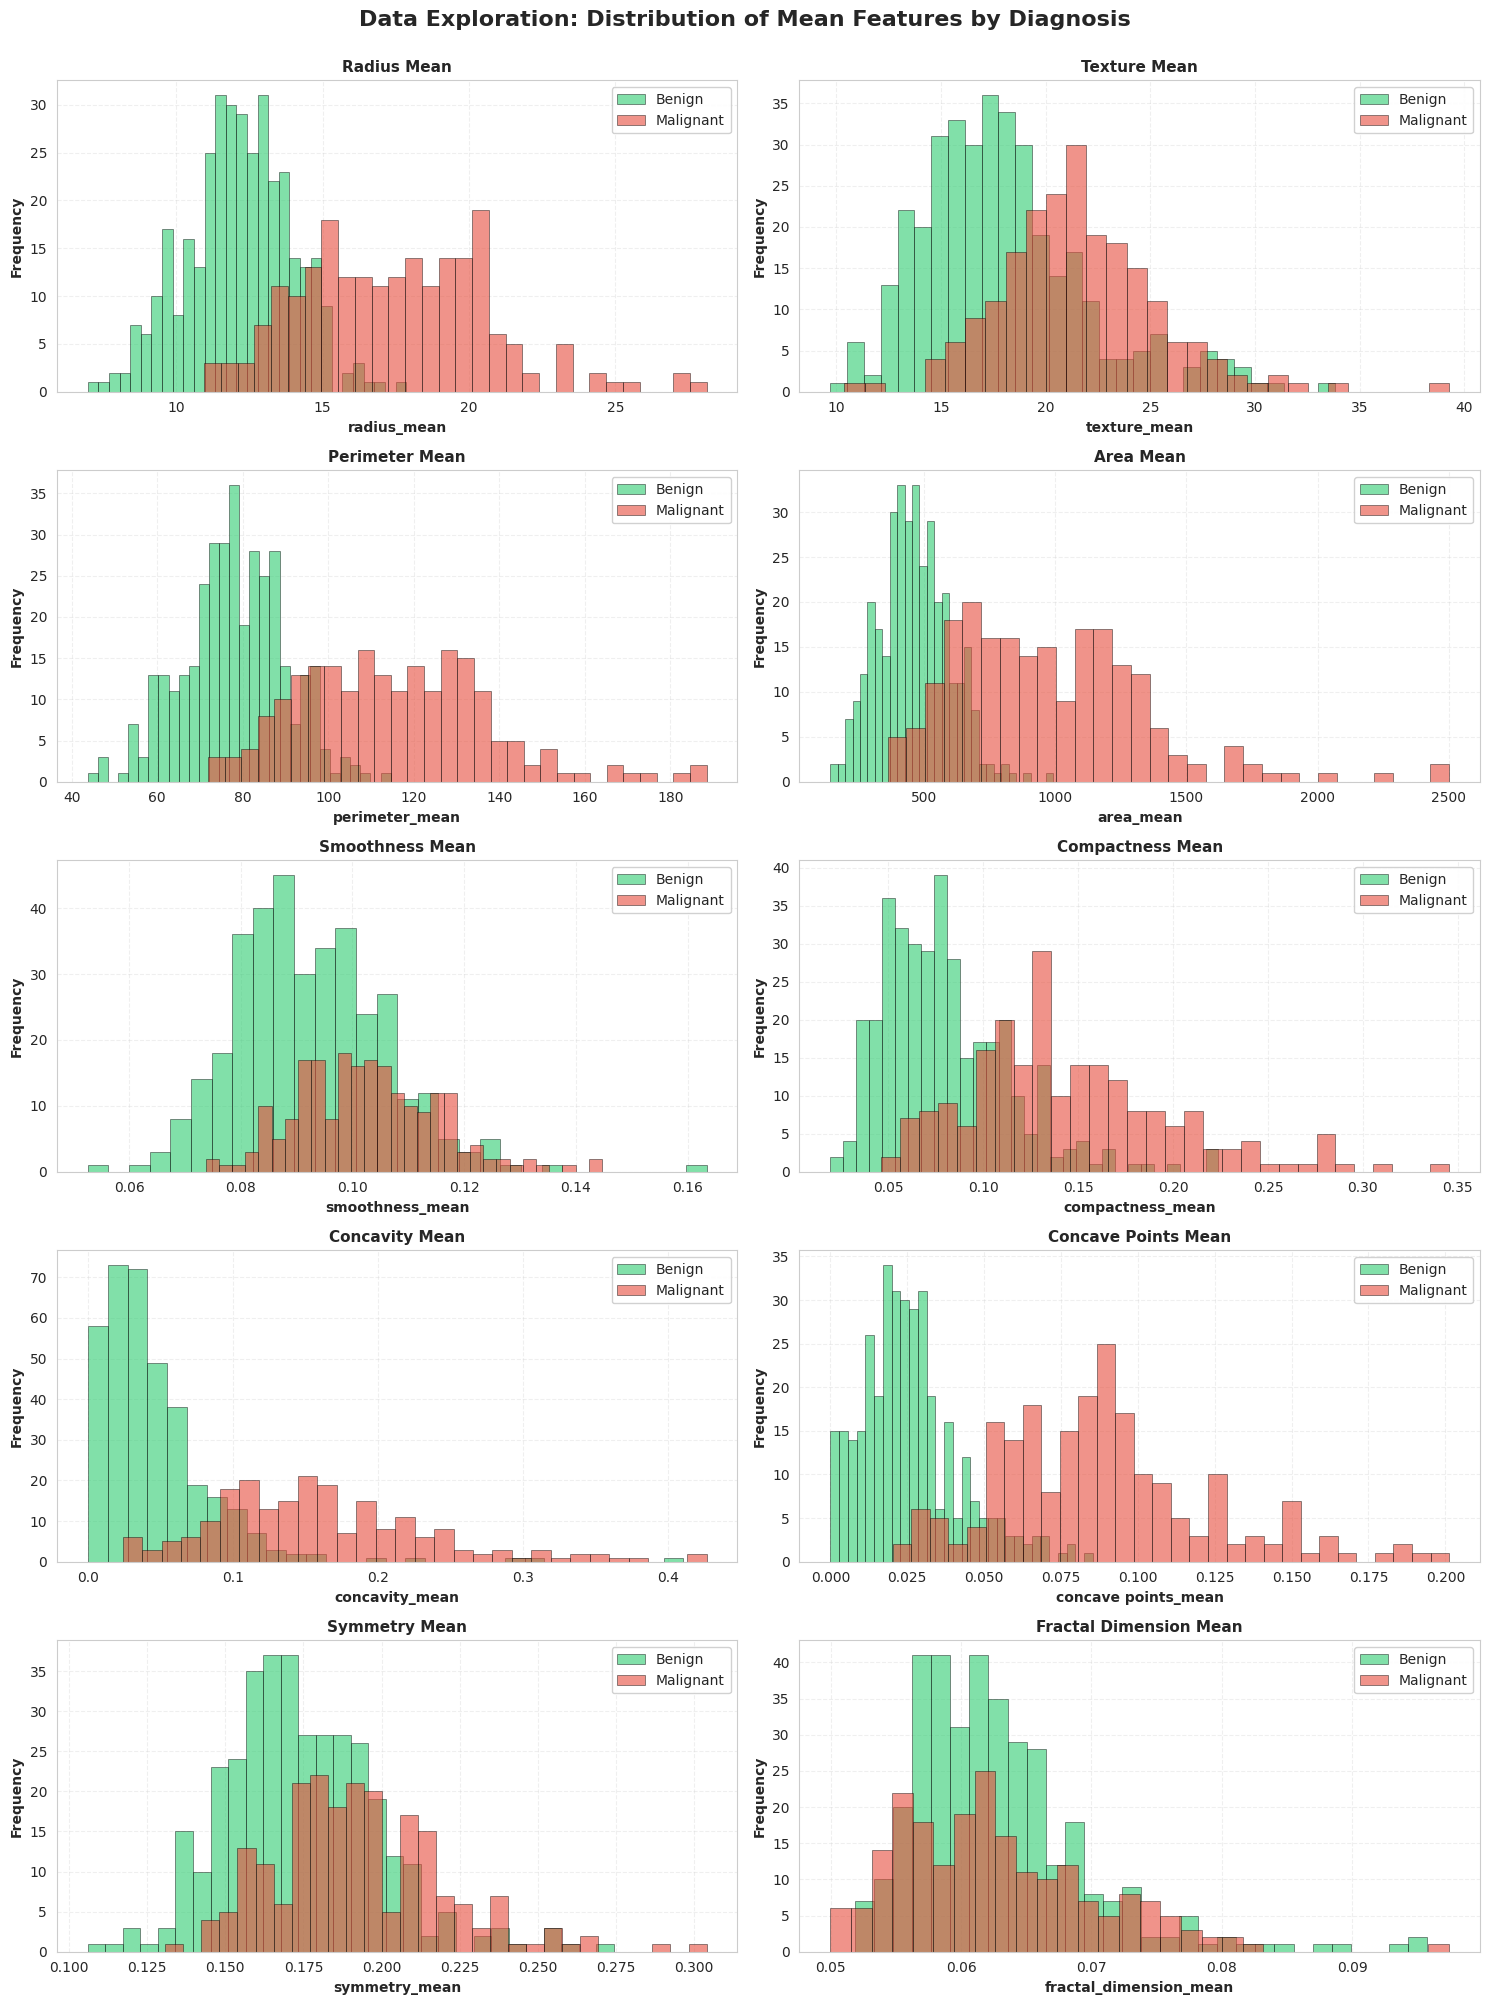

✓ Saved: 02_feature_distributions.png


In [34]:
if mean_features:
    # Get unique diagnosis classes
    diag_classes = sorted(df['diagnosis'].unique())

    # Set up color mapping
    if set(diag_classes) == {'B', 'M'}:
        color_map = {'B': '#2ecc71', 'M': '#e74c3c'}
        label_map = {'B': 'Benign', 'M': 'Malignant'}
    else:
        color_map = {cls: plt.cm.Set2(i) for i, cls in enumerate(diag_classes)}
        label_map = {cls: str(cls) for cls in diag_classes}

    # Create subplots
    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        for diag_class in diag_classes:
            subset_data = df[df['diagnosis'] == diag_class][col]
            axes[idx].hist(subset_data, bins=30, alpha=0.6,
                          label=label_map[diag_class],
                          color=color_map[diag_class],
                          edgecolor='black', linewidth=0.5)

        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].legend(loc='upper right', framealpha=0.9)
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Distribution of Mean Features by Diagnosis',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('02_feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 02_feature_distributions.png")
else:
    print("⚠ No mean features detected")

**Box Plots for Outlier Exploration**

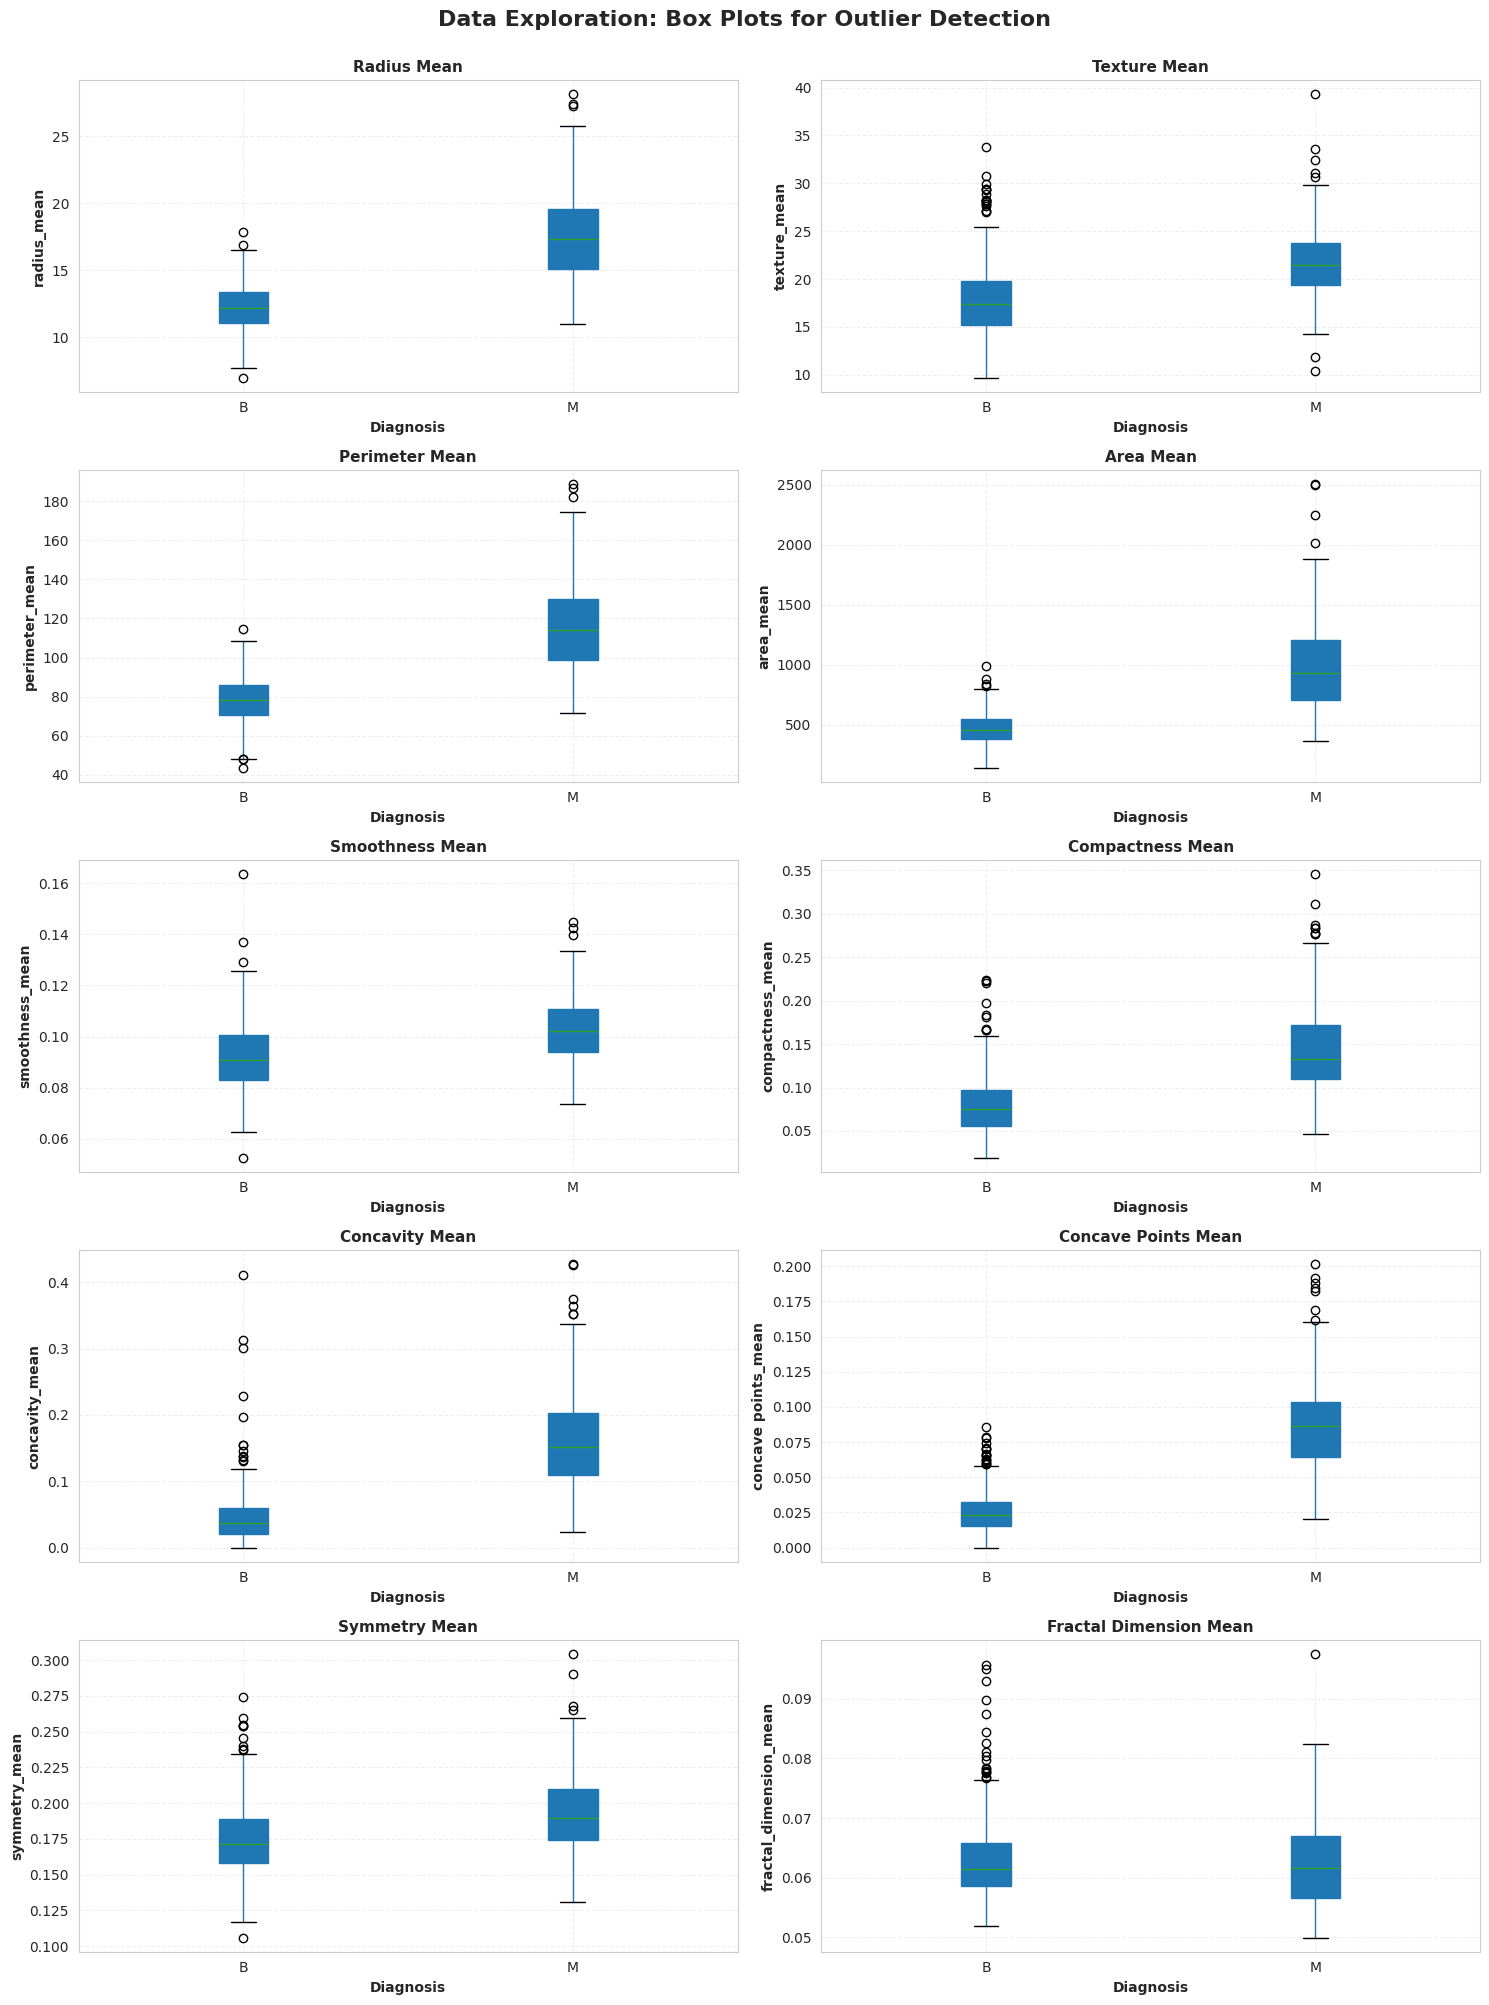

✓ Saved: 03_boxplots_outliers.png


In [35]:
if mean_features:
    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        df.boxplot(column=col, by='diagnosis', ax=axes[idx], patch_artist=True)

        axes[idx].set_xlabel('Diagnosis', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].get_figure().suptitle('')
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Box Plots for Outlier Detection',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('03_boxplots_outliers.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 03_boxplots_outliers.png")
else:
    print("⚠ No mean features detected")

**Correlation Matrix - Feature Relationships**

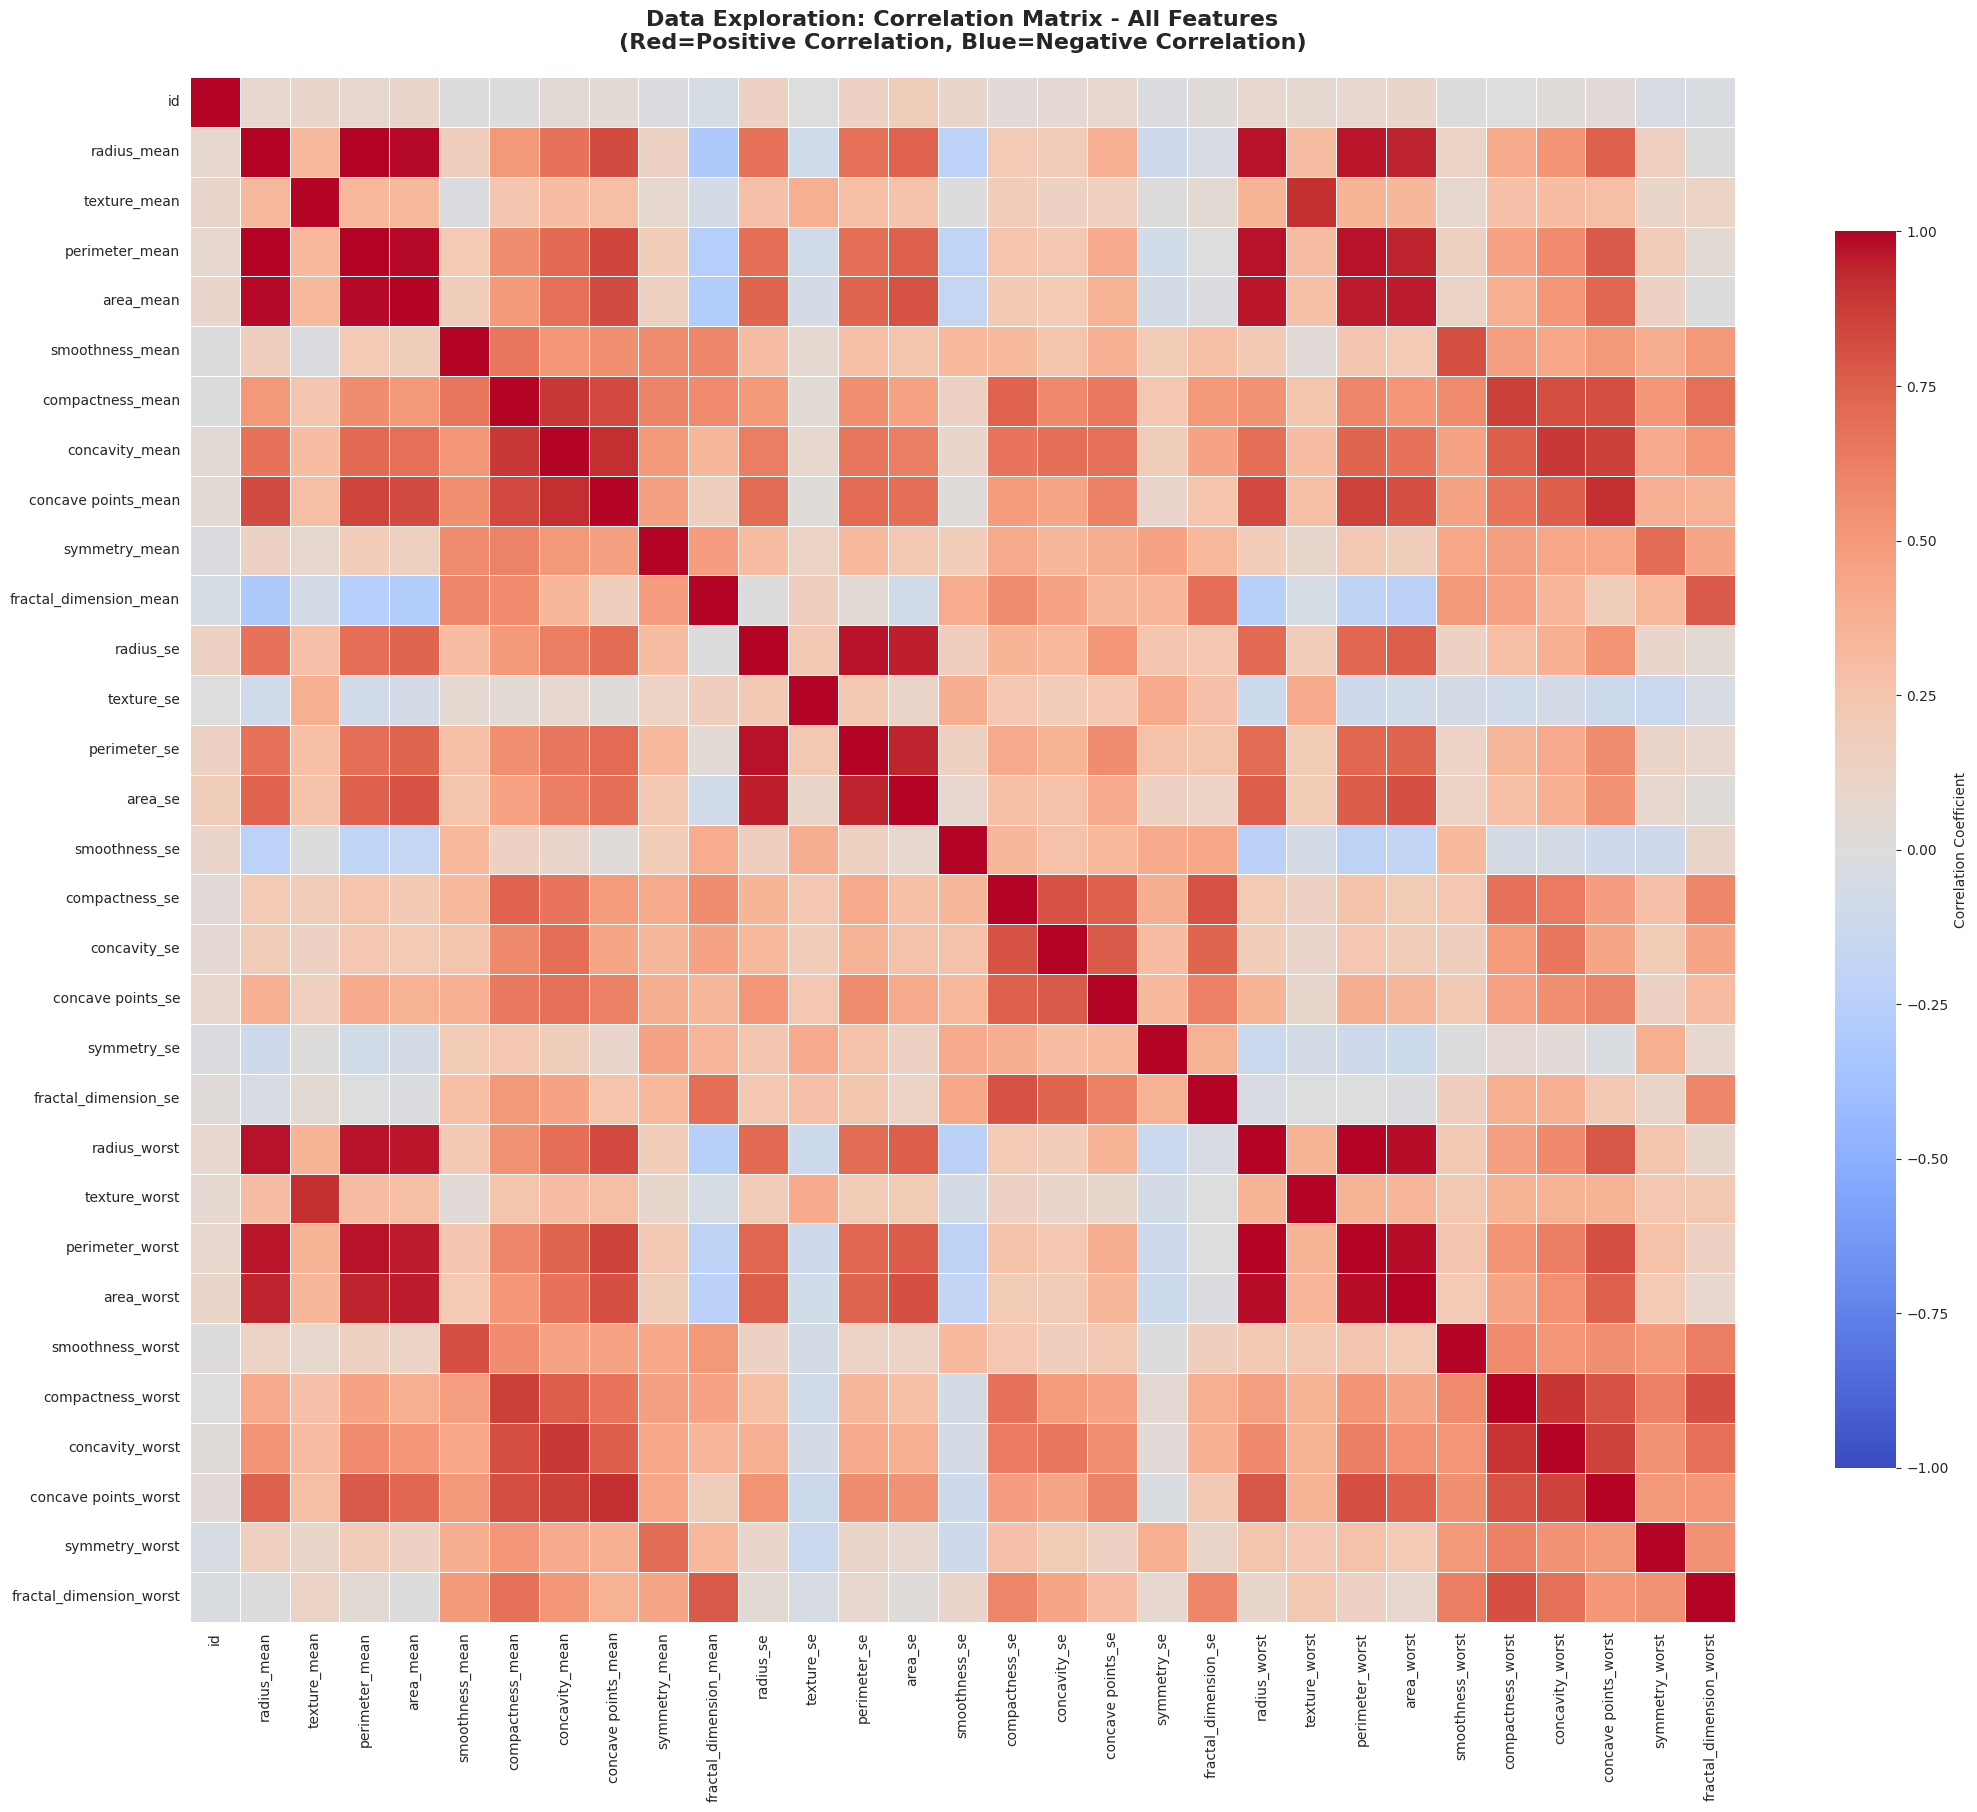

✓ Saved: 04_correlation_matrix.png

  Found 21 highly correlated pairs (|r| > 0.9)
  Top 5 highest correlations:
    1. radius_mean <-> perimeter_mean: 0.9979
    2. radius_worst <-> perimeter_worst: 0.9937
    3. radius_mean <-> area_mean: 0.9874
    4. perimeter_mean <-> area_mean: 0.9865
    5. radius_worst <-> area_worst: 0.9840


In [36]:
numeric_features_only = df.select_dtypes(include=[np.number]).drop('diagnosis', axis=1, errors='ignore')

if len(numeric_features_only.columns) > 0:
    plt.figure(figsize=(22, 18))
    correlation_matrix = numeric_features_only.corr()

    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
                linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
                square=True, vmin=-1, vmax=1)

    plt.title('Data Exploration: Correlation Matrix - All Features\n(Red=Positive Correlation, Blue=Negative Correlation)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('04_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 04_correlation_matrix.png")

    # Identify highly correlated pairs
    high_corr_threshold = 0.9
    high_corr_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))

    if high_corr_pairs:
        print(f"\n  Found {len(high_corr_pairs)} highly correlated pairs (|r| > {high_corr_threshold})")
        print(f"  Top 5 highest correlations:")
        sorted_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
        for i, (feat1, feat2, corr) in enumerate(sorted_pairs[:5], 1):
            print(f"    {i}. {feat1} <-> {feat2}: {corr:.4f}")
else:
    print("⚠ No numeric features for correlation analysis")

**Feature-Target Correlation Analysis**

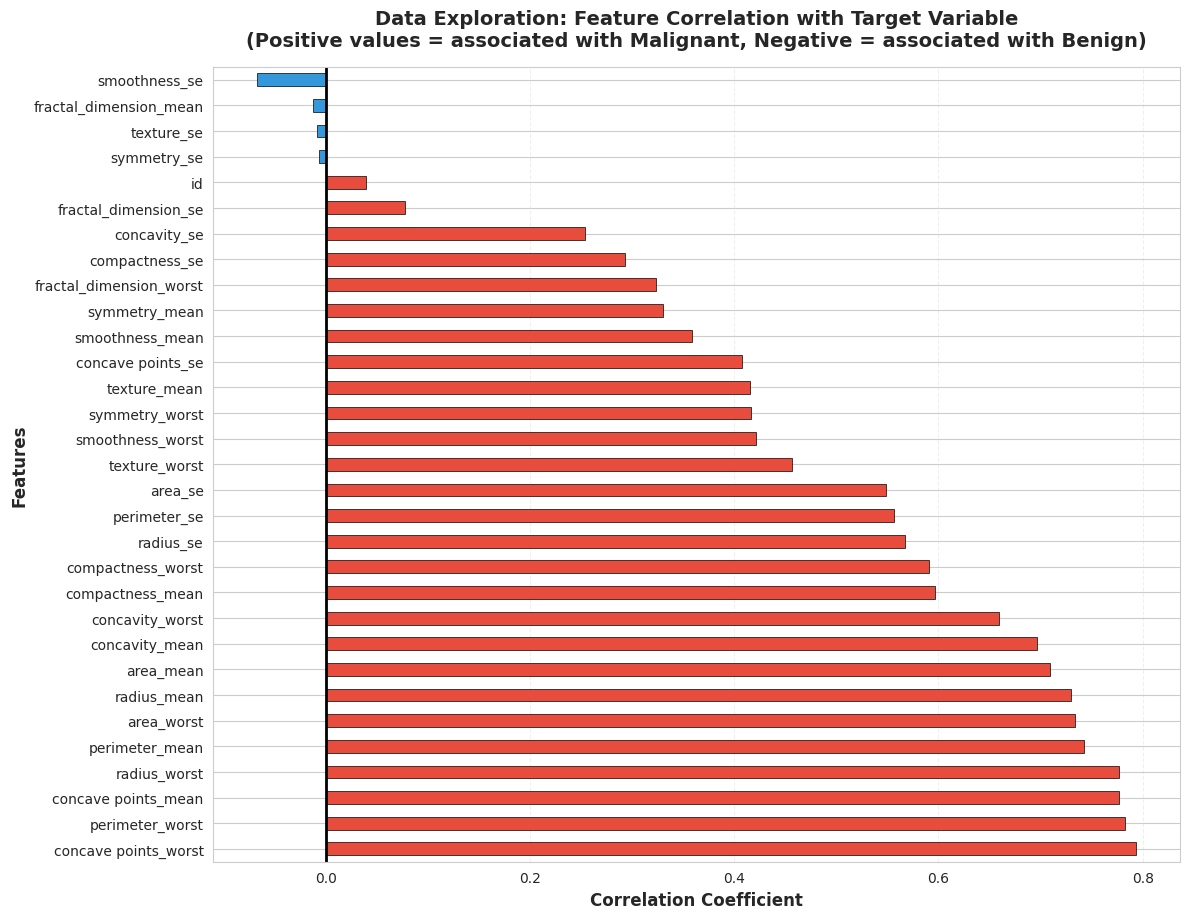

✓ Saved: 05_target_correlation.png

  Top 10 features most correlated with Malignant (M):
     1. concave points_worst                    :  0.7936
     2. perimeter_worst                         :  0.7829
     3. concave points_mean                     :  0.7766
     4. radius_worst                            :  0.7765
     5. perimeter_mean                          :  0.7426
     6. area_worst                              :  0.7338
     7. radius_mean                             :  0.7300
     8. area_mean                               :  0.7090
     9. concavity_mean                          :  0.6964
    10. concavity_worst                         :  0.6596

  Top 10 features most correlated with Benign (B):
     1. symmetry_mean                           :  0.3305
     2. fractal_dimension_worst                 :  0.3239
     3. compactness_se                          :  0.2930
     4. concavity_se                            :  0.2537
     5. fractal_dimension_se                  

In [39]:
if 'diagnosis' in df.columns:
    # Create a temporary numeric version for correlation analysis only
    # (We don't modify the original dataframe - that's for Data Preparation phase)
    df_temp = df.copy()

    # Encode diagnosis temporarily: M=1, B=0
    if df_temp['diagnosis'].dtype == 'object':
        df_temp['diagnosis'] = df_temp['diagnosis'].map({'M': 1, 'B': 0})

    # Calculate correlations with numeric diagnosis
    correlations_with_diagnosis = df_temp.corr()['diagnosis'].drop('diagnosis', errors='ignore').sort_values(ascending=False)

    if len(correlations_with_diagnosis) > 0:
        plt.figure(figsize=(12, max(8, len(correlations_with_diagnosis) * 0.3)))
        colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations_with_diagnosis.values]
        correlations_with_diagnosis.plot(kind='barh', color=colors,
                                         edgecolor='black', linewidth=0.5)

        plt.xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
        plt.ylabel('Features', fontsize=12, fontweight='bold')
        plt.title('Data Exploration: Feature Correlation with Target Variable\n(Positive values = associated with Malignant, Negative = associated with Benign)',
                  fontsize=14, fontweight='bold', pad=15)
        plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
        plt.grid(True, alpha=0.3, axis='x', linestyle='--')
        plt.tight_layout()
        plt.savefig('05_target_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✓ Saved: 05_target_correlation.png")

        print(f"\n  Top 10 features most correlated with Malignant (M):")
        for i, (feat, corr) in enumerate(correlations_with_diagnosis.head(10).items(), 1):
            print(f"    {i:2d}. {feat:40s}: {corr:7.4f}")

        print(f"\n  Top 10 features most correlated with Benign (B):")
        for i, (feat, corr) in enumerate(correlations_with_diagnosis.tail(10).items(), 1):
            print(f"    {i:2d}. {feat:40s}: {corr:7.4f}")
    else:
        print("⚠ Unable to calculate correlations")
else:
    print("⚠ 'diagnosis' column not found")

**Scatter Plots - Feature Patterns**

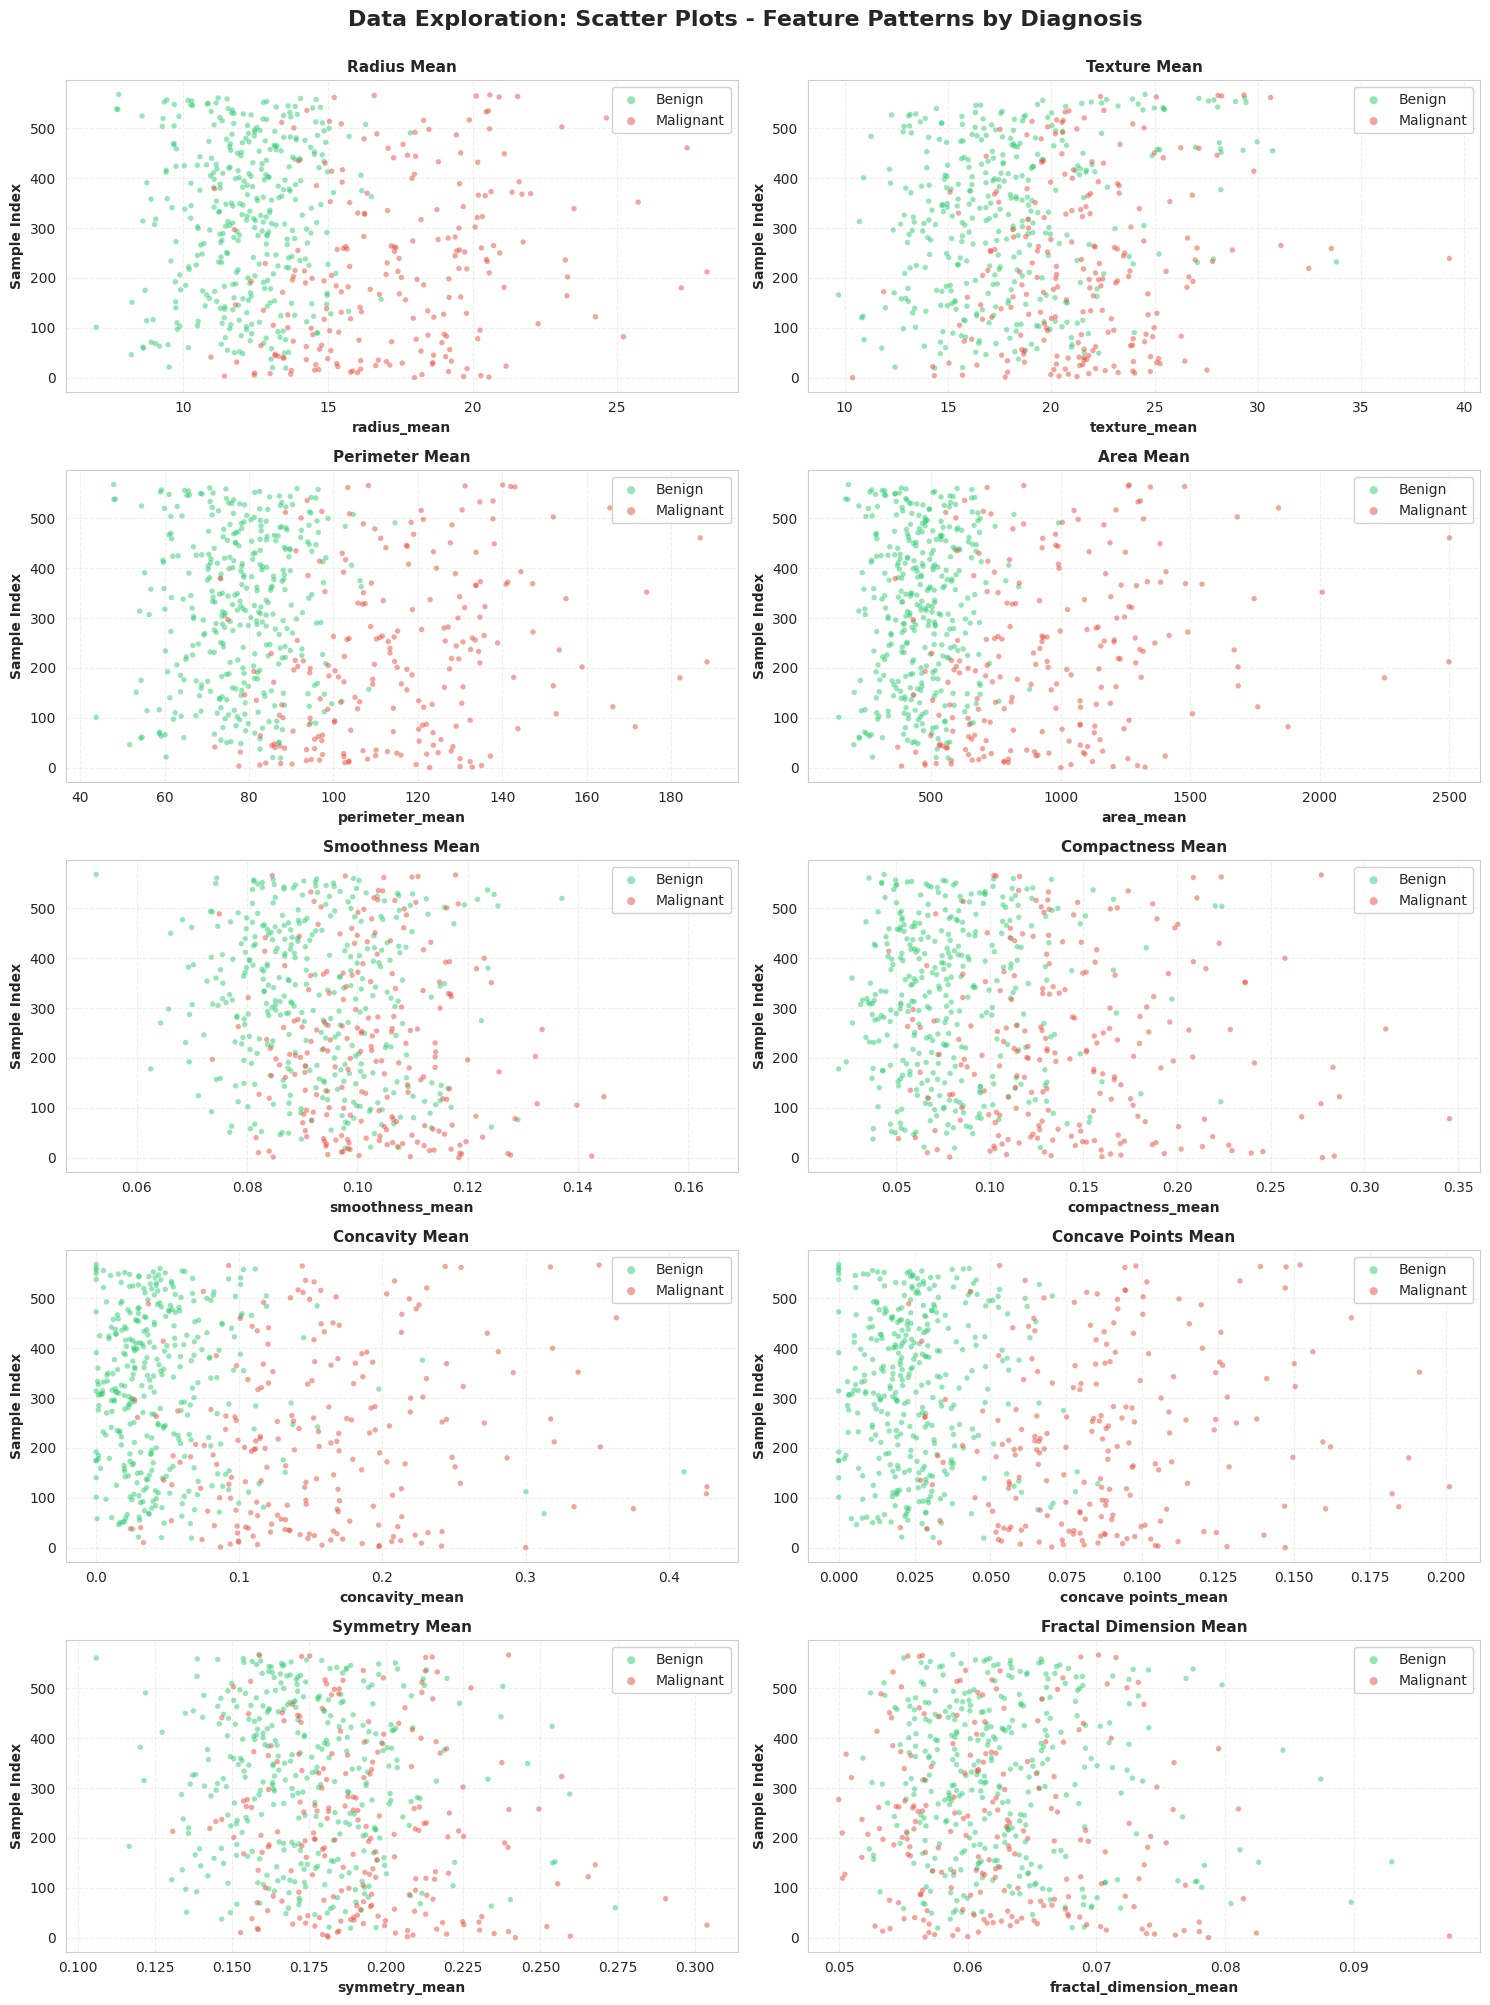

✓ Saved: 06_scatter_patterns.png


In [40]:
if mean_features:
    diag_classes = sorted(df['diagnosis'].unique())

    if set(diag_classes) == {'B', 'M'}:
        color_map = {'B': '#2ecc71', 'M': '#e74c3c'}
        label_map = {'B': 'Benign', 'M': 'Malignant'}
    else:
        color_map = {cls: plt.cm.Set2(i) for i, cls in enumerate(diag_classes)}
        label_map = {cls: str(cls) for cls in diag_classes}

    n_plots = len(mean_features)
    n_cols = 2
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()

    for idx, col in enumerate(mean_features):
        for diag_class in diag_classes:
            subset = df[df['diagnosis'] == diag_class]
            axes[idx].scatter(subset[col], subset.index, alpha=0.5, s=15,
                            c=color_map[diag_class], label=label_map[diag_class],
                            edgecolors='none')

        axes[idx].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Sample Index', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'{col.replace("_", " ").title()}',
                           fontsize=11, fontweight='bold')
        axes[idx].legend(loc='upper right', framealpha=0.9, markerscale=1.5)
        axes[idx].grid(True, alpha=0.3, linestyle='--')

    for idx in range(len(mean_features), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Data Exploration: Scatter Plots - Feature Patterns by Diagnosis',
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('06_scatter_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: 06_scatter_patterns.png")
else:
    print("⚠ No mean features detected")

## II - 4. Data Quality Verification

**Check for missing values**

In [16]:
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT - MISSING VALUES")
print("="*80)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No missing values found in the dataset")


DATA QUALITY ASSESSMENT - MISSING VALUES

✓ No missing values found in the dataset


**Check for duplicate rows**

In [17]:
print("\n" + "-"*80)
print("Duplicate Records Check:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("⚠ Warning: Duplicate rows detected")
else:
    print("✓ No duplicate rows found")


--------------------------------------------------------------------------------
Duplicate Records Check:
Number of duplicate rows: 0
✓ No duplicate rows found


**Check for unique identifier (ID column)**

In [15]:
if 'id' in df.columns or 'ID' in df.columns:
    id_col = 'id' if 'id' in df.columns else 'ID'
    print(f"\n✓ ID column found: '{id_col}'")
    print(f"  - Total IDs: {len(df[id_col])}")
    print(f"  - Unique IDs: {df[id_col].nunique()}")
    if len(df[id_col]) == df[id_col].nunique():
        print("  ✓ All IDs are unique (good for tracking)")


✓ ID column found: 'id'
  - Total IDs: 569
  - Unique IDs: 569
  ✓ All IDs are unique (good for tracking)


**All-NaN Columns Check**

In [41]:
nan_cols = df.columns[df.isna().all()].tolist()
if nan_cols:
    print(f"\n⚠ Found {len(nan_cols)} column(s) with all NaN values:")
    for col in nan_cols:
        print(f"  • {col}")
    print("\n→ Action Required: These columns should be removed in Data Preparation")
else:
    print("\n✓ No columns with all NaN values")


✓ No columns with all NaN values


**Data Type Consistency**

In [42]:
print("\nData Type Distribution:")
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"  • {str(dtype):15s}: {count:3d} column(s)")

# Check for mixed types in object columns
object_cols = df.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"\nObject columns detected: {len(object_cols)}")
    for col in object_cols:
        unique_types = df[col].dropna().apply(type).unique()
        print(f"  • {col}: {len(unique_types)} type(s)")
        if len(unique_types) > 1:
            print(f"    ⚠ Mixed types detected")
else:
    print("\n✓ No object columns - All numeric data")


Data Type Distribution:
  • float64        :  30 column(s)
  • int64          :   1 column(s)
  • object         :   1 column(s)

Object columns detected: 1
  • diagnosis: 1 type(s)


**Outlier Detection Summary**

In [43]:
if len(numeric_cols) > 0:
    print("\nUsing IQR method to detect outliers:")
    print(f"{'Feature':<30s} {'Outliers':>10s} {'Percentage':>12s}")
    print("-"*80)

    total_outliers = 0
    outlier_features = []

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / len(df)) * 100

        if n_outliers > 0:
            print(f"{col:<30s} {n_outliers:>10d} {pct_outliers:>11.2f}%")
            total_outliers += n_outliers
            outlier_features.append(col)

    print("-"*80)
    print(f"\nSummary:")
    print(f"  • Features with outliers: {len(outlier_features)}/{len(numeric_cols)}")
    print(f"  • Total outlier instances: {total_outliers}")

    if len(outlier_features) > 0:
        print("\n→ Action Required: Review outliers in Data Preparation")
        print("  Consider: removal, transformation, or keeping for medical relevance")
    else:
        print("\n✓ No significant outliers detected")
else:
    print("\n⚠ No numeric columns for outlier detection")


Using IQR method to detect outliers:
Feature                          Outliers   Percentage
--------------------------------------------------------------------------------
id                                     81       14.24%
radius_mean                            14        2.46%
texture_mean                            7        1.23%
perimeter_mean                         13        2.28%
area_mean                              25        4.39%
smoothness_mean                         6        1.05%
compactness_mean                       16        2.81%
concavity_mean                         18        3.16%
concave points_mean                    10        1.76%
symmetry_mean                          15        2.64%
fractal_dimension_mean                 15        2.64%
radius_se                              38        6.68%
texture_se                             20        3.51%
perimeter_se                           38        6.68%
area_se                                65       11.42%
s

**Class Balance Verification**

In [44]:
if 'diagnosis' in df.columns:
    print("\nTarget Variable Balance:")
    for diag_class in sorted(df['diagnosis'].unique()):
        count = (df['diagnosis'] == diag_class).sum()
        pct = (count / len(df)) * 100
        print(f"  • Class '{diag_class}': {count:4d} samples ({pct:5.2f}%)")

    if len(diagnosis_counts) == 2:
        imbalance_ratio = diagnosis_counts.max() / diagnosis_counts.min()
        print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

        if imbalance_ratio > 3:
            print("⚠ Significant class imbalance detected")
            print("→ Action Required: Consider resampling techniques in Data Preparation")
        elif imbalance_ratio > 1.5:
            print("⚠ Moderate class imbalance detected")
            print("→ Recommendation: Monitor model performance per class")
        else:
            print("✓ Classes are well balanced - No action needed")
else:
    print("\n⚠ Target variable not found")


Target Variable Balance:
  • Class 'B':  357 samples (62.74%)
  • Class 'M':  212 samples (37.26%)

Imbalance Ratio: 1.68:1
⚠ Moderate class imbalance detected
→ Recommendation: Monitor model performance per class


# III - Data Preparation

In [ ]:

# Remove 'id' column as it's not relevant for classification
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\n✓ 'id' column removed")

# Remove 'Unnamed: 32' column if it exists (common in this dataset)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("✓ 'Unnamed: 32' column removed")

print(f"\nDataset shape after cleaning: {df.shape}")


✓ 'id' column removed
✓ 'Unnamed: 32' column removed

Dataset shape after cleaning: (569, 31)


In [ ]:
# 10. DATA NORMALIZATION
# ============================================================================
print("\n" + "="*80)
print("DATA NORMALIZATION")
print("="*80)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features using StandardScaler (as mentioned in the paper)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\n✓ Features normalized using StandardScaler (mean=0, std=1)")
print("\nNormalized data statistics:")
print(X_normalized_df.describe())


DATA NORMALIZATION

Features shape: (569, 30)
Target shape: (569,)

✓ Features normalized using StandardScaler (mean=0, std=1)

Normalized data statistics:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17

In [ ]:
# 11. TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split data: 80% train, 20% test (paper used 70/30, but you specified 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"  Benign: {(y_train == 0).sum()} samples")
print(f"  Malignant: {(y_train == 1).sum()} samples")

print(f"\nTesting set class distribution:")
print(f"  Benign: {(y_test == 0).sum()} samples")
print(f"  Malignant: {(y_test == 1).sum()} samples")


TRAIN-TEST SPLIT

Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Training set class distribution:
  Benign: 285 samples
  Malignant: 170 samples

Testing set class distribution:
  Benign: 72 samples
  Malignant: 42 samples


In [ ]:
# 12. SAVE PROCESSED DATA
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save normalized data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("\n✓ Data saved successfully:")
print("  - X_train.npy")
print("  - X_test.npy")
print("  - y_train.npy")
print("  - y_test.npy")

# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print("  - feature_names.txt")

# Save scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  - scaler.pkl")



SAVING PROCESSED DATA

✓ Data saved successfully:
  - X_train.npy
  - X_test.npy
  - y_train.npy
  - y_test.npy
  - feature_names.txt
  - scaler.pkl


In [ ]:
# 13. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

summary_report = f"""
WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT
{'='*80}

1. DATASET OVERVIEW
   - Total samples: {df.shape[0]}
   - Total features: {df.shape[1] - 1} (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)
   - Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)
   - Balance: {'Relatively balanced' if abs(diagnosis_percentages['B'] - diagnosis_percentages['M']) < 20 else 'Imbalanced'}

3. FEATURE CATEGORIES
   - Mean features: {len(mean_features)}
   - Standard Error features: {len(se_features)}
   - Worst features: {len(worst_features)}
   - Total: {len(mean_features) + len(se_features) + len(worst_features)} features

4. DATA QUALITY
   - Missing values: {'None' if len(missing_df) == 0 else f'{len(missing_df)} columns'}
   - Duplicates: {df.duplicated().sum()}
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: {(X_train.shape[0]/len(df))*100:.0f}% / {(X_test.shape[0]/len(df))*100:.0f}%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.head(5).index])}

   - Least correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.tail(5).index])}



{'='*80}
Report generated successfully!
"""

print(summary_report)

# Save report to file
with open('EDA_REPORT.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n✓ Complete EDA report saved as 'EDA_REPORT.txt'")

print("\n" + "="*80)
print("DATA PREPARATION & EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nYou can now share the processed data files with your team members.")
print("All visualizations and the detailed report are ready for your project submission.")


SUMMARY REPORT


NameError: name 'df' is not defined

#IV - Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
],name='ANN_Model')


In [ ]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6961 - loss: 0.6139 - val_accuracy: 0.8791 - val_loss: 0.4429
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8976 - loss: 0.4016 - val_accuracy: 0.9231 - val_loss: 0.3119
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9527 - loss: 0.2491 - val_accuracy: 0.9231 - val_loss: 0.2281
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9558 - loss: 0.1920 - val_accuracy: 0.9231 - val_loss: 0.1868
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9727 - loss: 0.1433 - val_accuracy: 0.9451 - val_loss: 0.1633
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9730 - loss: 0.1162 - val_accuracy: 0.9560 - val_loss: 0.1514
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9834 - loss: 0.0935 - val_accuracy: 0.9560 - val_loss: 0.1444
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9877 - loss: 0.0735 - val_accuracy: 0.9451 - val_loss

#V - Evaluation

In [ ]:
model.summary()


Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9815 - loss: 0.1045
Test Accuracy: 98.25%


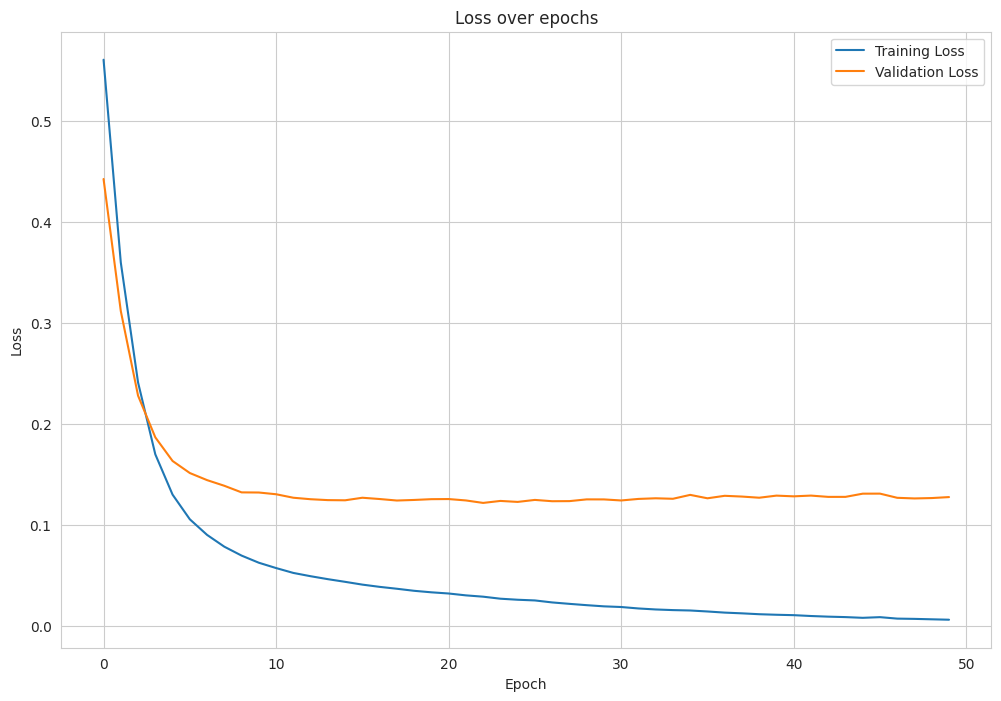

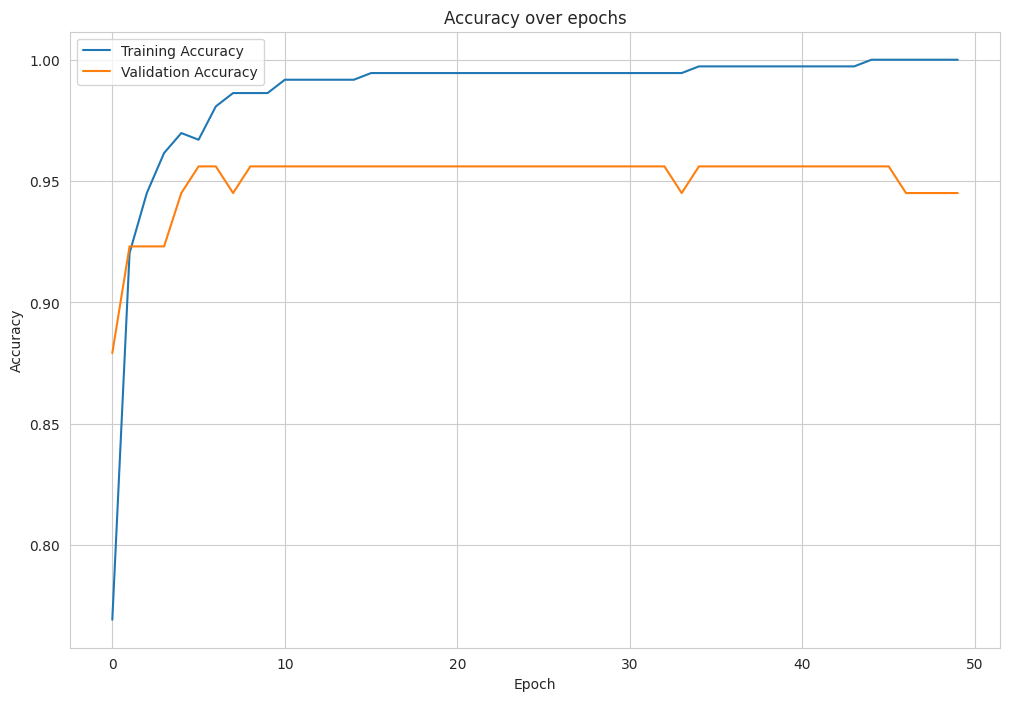

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


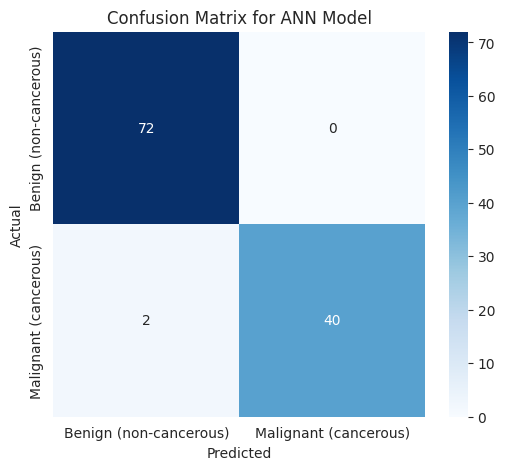

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

class_names = ['Benign (non-cancerous)', 'Malignant (cancerous)']
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for ANN Model')
plt.show()


# VI - Deployment